# Cole's Metric

One way to measure a neighborhood's ability to hold a street race is to measure how many speed bumps are in the neighborhood. In our case `MORE SPEEDBUMPS = MORE DANGEROUS` which is not good when considering a race track

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

## Getting the data

Below is a data set pulledfrom the WPRDC on all of the speed bumps in Pittsburgh. Each speed bump is described using data like location, what it is made of, and its id

In [5]:
speed_humps_data = pd.read_csv("speed_humps.csv")
speed_humps_data.head(10)

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355
5,25169591,10,4224.0,Saline St,4673,Asphalt,Squirrel Hill South,5,15,42003141400,3,15,4,2-15,40.422239,-79.926208
6,2056880845,11,2146.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.391643,-79.999307
7,1735565853,12,2082.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.392425,-79.999259
8,857069875,13,2013.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.393264,-79.999401
9,1822275525,14,1937.0,Jacob St,17688,Asphalt,Brookline,4,32,42003320600,5,32,6,4-25,40.394180,-79.999611


Most of this data isnt useful to us so lets narrow it down to how many times each neighborhood is mentioned in the data

This is helpful because this will now sort the data by neighborhood and speed bump count rather than each speed bumps id and all of its data

In [7]:
humps_per_hood = speed_humps_data["neighborhood"].value_counts()
humps_per_hood.head(10)

Squirrel Hill South    18
Carrick                 9
North Oakland           6
Polish Hill             6
Upper Hill              4
Perry North             4
South Side Slopes       4
Homewood South          4
Brookline               4
Garfield                3
Name: neighborhood, dtype: int64

## Visualizing the Data

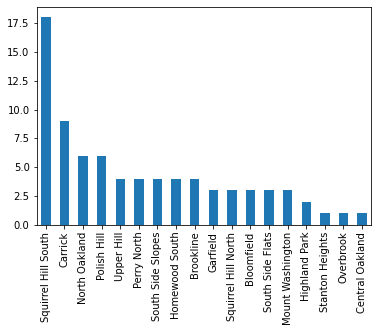

In [8]:
humps_per_hood.plot.bar()

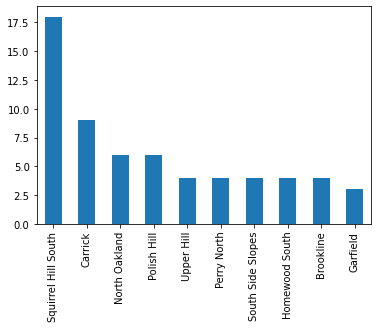

In [9]:
humps_per_hood.head(10).plot.bar()

In [17]:
humps_data = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values})
hmax = humps_data["humps"].max()
humps_data.head(10)

,neighborhood,humps
0,Squirrel Hill South,18
1,Carrick,9
2,North Oakland,6
3,Polish Hill,6
4,Upper Hill,4
5,Perry North,4
6,South Side Slopes,4
7,Homewood South,4
8,Brookline,4
9,Garfield,3


In [21]:
humps_data.tail(5)

,neighborhood,humps
13,Mount Washington,3
14,Highland Park,2
15,Stanton Heights,1
16,Overbrook,1
17,Central Oakland,1


Lets normalize all of this data to 1 meaning that the neighborhood that has the most speed bumps will get a score of 1 and the others will get a score based on its percentage of the max

In [11]:
humps_data_normal = pd.DataFrame({"neighborhood" : humps_per_hood.axes[0], "humps" : humps_per_hood.values/hmax})
humps_data_normal.head(10)

,neighborhood,humps
0,Squirrel Hill South,1.000000
1,Carrick,0.500000
2,North Oakland,0.333333
3,Polish Hill,0.333333
4,Upper Hill,0.222222
5,Perry North,0.222222
6,South Side Slopes,0.222222
7,Homewood South,0.222222
8,Brookline,0.222222
9,Garfield,0.166667


In [20]:
humps_data_normal.tail(5)

,neighborhood,humps
13,Mount Washington,0.166667
14,Highland Park,0.111111
15,Stanton Heights,0.055556
16,Overbrook,0.055556
17,Central Oakland,0.055556


# Finally, Applying the Data

Now lets apply the speed bumps data to a map of pittsburgh. The darker the neighborhood is colored, the more speed bumps it has

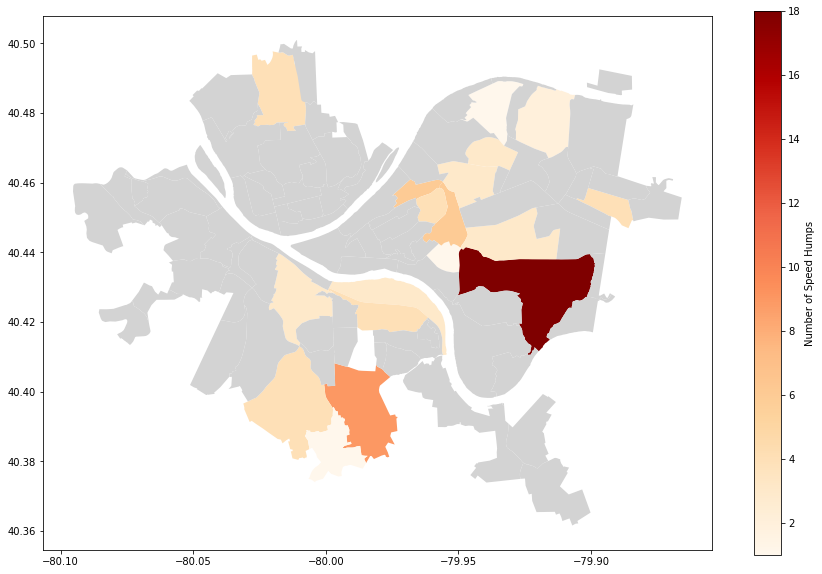

In [12]:
hoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
humps_map = hoods.merge(humps_data, how="left", left_on="hood", right_on="neighborhood")
humps_map.plot(column="humps", legend=True, legend_kwds={"label": "Number of Speed Humps"}, figsize=(15,10), missing_kwds={"color": "lightgrey"}, cmap="OrRd")
plt.style.use('seaborn')

# Conclusion
Based on the data, it is very clear that Squirrel Hill South is the worst neighborhood to hold a race in. With 18 speed bumps(which is double the amount the next worst neighborhood has) it would be very difficult to race around these streets. There is a 3 way tie for first place with one speed bump a piece. These neighborhoods are Central Oakland, Overbrook, Stanton Heights